In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Set the style globally for all plots
sns.set(style="darkgrid")

## 0. Load Data

In [2]:
data = pd.read_csv('../data/data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


## 1. Data Analysis: First Sight

### How is the date distribuited?

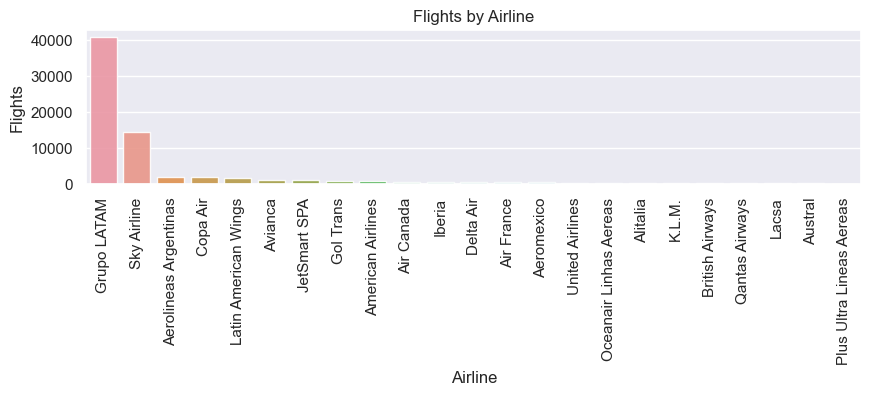

In [3]:
# Count flights per airline from 'OPERA' column
flights_by_airline = data['OPERA'].value_counts()

# Set figure size to 10x2 inches
plt.figure(figsize=(10, 2))

# Create bar plot: x=airlines, y=flight counts, alpha=0.9 for visibility
sns.barplot(x=flights_by_airline.index, y=flights_by_airline.values, alpha=0.9)

# Add title and labels with font size 12
plt.title('Flights by Airline')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Airline', fontsize=12)

# Rotate x-axis labels 90 degrees for readability
plt.xticks(rotation=90)

plt.show()

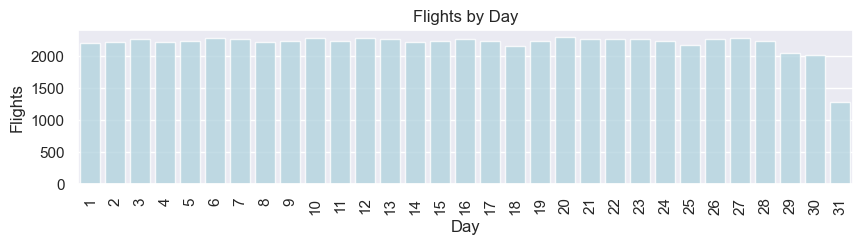

In [4]:
# Count flights per day from 'DIA' column
flights_by_day = data['DIA'].value_counts()

# Set figure size to 10x2 inches
plt.figure(figsize=(10, 2))

# Create bar plot: x=days, y=flight counts, set custom color, alpha=0.8 for visibility
sns.barplot(x=flights_by_day.index, y=flights_by_day.values, color='lightblue', alpha=0.8)

# Add title and labels with font size 12
plt.title('Flights by Day')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Day', fontsize=12)

# Rotate x-axis labels 90 degrees for readability
plt.xticks(rotation=90)

plt.show()

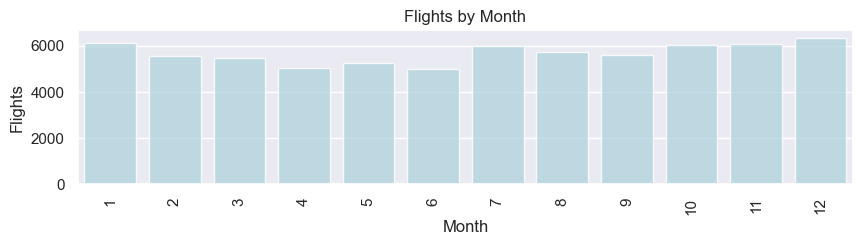

In [5]:
# Count flights per month from "MES" column
flights_by_month = data['MES'].value_counts()

# Set figure size to 10x2 inches
plt.figure(figsize=(10, 2))

# Create bar plot: x=months, y=flight counts, custmo color, alpha=0.8 for visibility
sns.barplot(x=flights_by_month.index, y=flights_by_month.values, color='lightblue', alpha=0.8)

# Add title and labels with font size 12
plt.title('Flights by Month')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Month', fontsize=12)

#Rotate x-axis labels 90 degres for readability
plt.xticks(rotation=90)

plt.show()

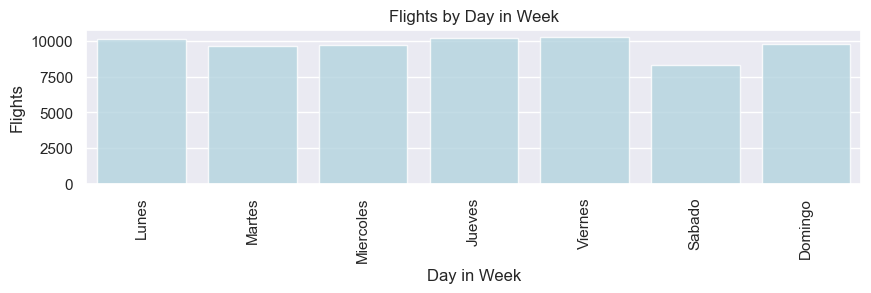

In [6]:
# Count flights per day of the week from "DIANOM" column
flights_by_day_in_week = data['DIANOM'].value_counts()

# Predifine the days to set the order
day_order = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']

# Reindex the counts to match the day order, filling missing days with 0
flights_ordered = flights_by_day_in_week.reindex(day_order, fill_value=0)

# Set figure size to 10x2 icnhes
plt.figure(figsize=(10, 2))

# Create bar plot: x=ordered days, y=flight counts, custom color, alpha=0.8
sns.barplot(x=flights_ordered.index, y=flights_ordered.values, color='lightblue', alpha=0.8)

# Add title and labels with font size 12
plt.title('Flights by Day in Week')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Day in Week', fontsize=12)

# Rotate x-axis labels 90 degrees for readability
plt.xticks(rotation=90)

plt.show()

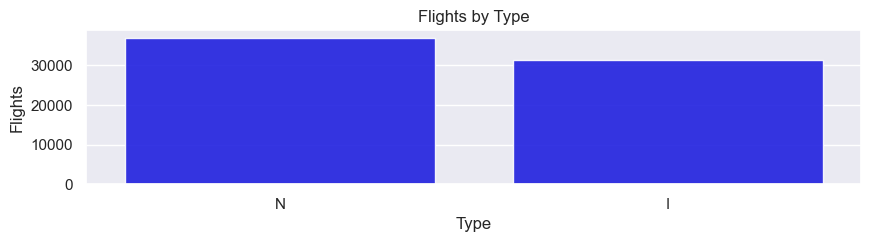

In [7]:
# Count flights by type from 'TIPOVUELO' column
flights_by_type = data['TIPOVUELO'].value_counts()

# Set figure size to 10x2 inches
plt.figure(figsize=(10, 2))

# Create bar plot: x=flight types, y=counts, custom color, alpha=0.9 for visibility
sns.barplot(x=flights_by_type.index, y=flights_by_type.values, color='blue', alpha=0.9)

# Add title and labels with font size 12
plt.title('Flights by Type')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Type', fontsize=12)

plt.show()

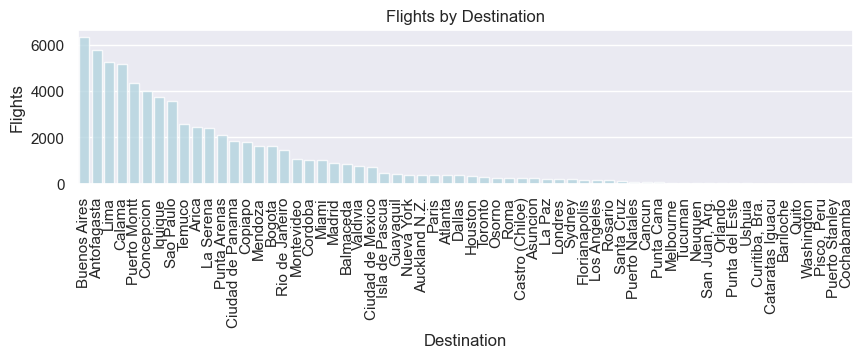

In [8]:
# Count flights by destination from 'SIGLADES' column
flight_by_destination = data['SIGLADES'].value_counts()

# Set figure size to 10x2 inches
plt.figure(figsize=(10, 2))

# Create bar plot: x=destinations, y=flight counts, custom color, alpha=0.8
sns.barplot(x=flight_by_destination.index, y=flight_by_destination.values, color='lightblue', alpha=0.8)

# Add title and labels with font size 12
plt.title('Flights by Destination')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Destination', fontsize=12)

# Rotate x-axis labels 90 degrees for readability with many destinations
plt.xticks(rotation=90)

plt.show()

## 2. Features Generation

### 2.a. Period of Day

In [9]:
from datetime import datetime

def get_period_day(date):
    """Classify a datetime string into 'mañana', 'tarde', or 'noche' based on time."""
    # Convert input date string to time object
    date_time = datetime.strptime(date, '%Y-%m-%d %H:%M:%S').time()
    
    # Define time boundaries for periods
    morning_min = datetime.strptime("05:00", '%H:%M').time()
    morning_max = datetime.strptime("11:59", '%H:%M').time()
    afternoon_min = datetime.strptime("12:00", '%H:%M').time()
    afternoon_max = datetime.strptime("18:59", '%H:%M').time()
    evening_min = datetime.strptime("19:00", '%H:%M').time()
    evening_max = datetime.strptime("23:59", '%H:%M').time()
    night_min = datetime.strptime("00:00", '%H:%M').time()
    night_max = datetime.strptime("04:59", '%H:%M').time()
    
    # Return period based on time ranges
    if date_time > morning_min and date_time < morning_max:
        return 'mañana'
    elif date_time > afternoon_min and date_time < afternoon_max:
        return 'tarde'
    elif (
        (date_time > evening_min and date_time < evening_max) or
        (date_time > night_min and date_time < night_max)
    ):
        return 'noche'

In [10]:
data['period_day'] = data['Fecha-I'].apply(get_period_day)

### 2.b. High Season

In [11]:
from datetime import datetime

def is_high_season(fecha):
    """Determine if a date falls within high season periods, returning 1 if true, 0 if false."""
    # Extract year from input date string and convert to datetime
    fecha_año = int(fecha.split('-')[0])
    fecha = datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S')
    
    # Define high season date ranges for each year
    range1_min = datetime.strptime('15-Dec', '%d-%b').replace(year=fecha_año)
    range1_max = datetime.strptime('31-Dec', '%d-%b').replace(year=fecha_año)
    range2_min = datetime.strptime('1-Jan', '%d-%b').replace(year=fecha_año)
    range2_max = datetime.strptime('3-Mar', '%d-%b').replace(year=fecha_año)
    range3_min = datetime.strptime('15-Jul', '%d-%b').replace(year=fecha_año)
    range3_max = datetime.strptime('31-Jul', '%d-%b').replace(year=fecha_año)
    range4_min = datetime.strptime('11-Sep', '%d-%b').replace(year=fecha_año)
    range4_max = datetime.strptime('30-Sep', '%d-%b').replace(year=fecha_año)
    
    # Check if date falls within any high season range
    if ((fecha >= range1_min and fecha <= range1_max) or 
        (fecha >= range2_min and fecha <= range2_max) or 
        (fecha >= range3_min and fecha <= range3_max) or
        (fecha >= range4_min and fecha <= range4_max)):
        return 1
    else:
        return 0

In [12]:
data['high_season'] = data['Fecha-I'].apply(is_high_season)

### 2.c. Difference in Minutes

In [13]:
from datetime import datetime

def get_min_diff(data):
    """Calculate the minute difference between operated (Fecha-O) and scheduled (Fecha-I) flight times."""
    # Convert operated and scheduled date strings to datetime objects
    fecha_o = datetime.strptime(data['Fecha-O'], '%Y-%m-%d %H:%M:%S')
    fecha_i = datetime.strptime(data['Fecha-I'], '%Y-%m-%d %H:%M:%S')
    
    # Compute difference in minutes between operated and scheduled times
    min_diff = ((fecha_o - fecha_i).total_seconds()) / 60
    
    return min_diff

In [14]:
data['min_diff'] = data.apply(get_min_diff, axis = 1)

### 2.d. Delay

In [15]:
threshold_in_minutes = 15
data['delay'] = np.where(data['min_diff'] > threshold_in_minutes, 1, 0)

In [16]:
data.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'period_day', 'high_season',
       'min_diff', 'delay'],
      dtype='object')

## 3. Data Analysis: Second Sight

### How is the delay rate across columns?

In [17]:
def get_rate_from_column(data, column):
    """Calculate delay rates (%) for each unique value in the specified column."""
    # Initialize dictionary to count delays per column value
    delays = {}
    for _, row in data.iterrows():
        if row['delay'] == 1:
            if row[column] not in delays:
                delays[row[column]] = 1
            else:
                delays[row[column]] += 1
    
    # Get total count per column value as a dictionary
    total = data[column].value_counts().to_dict()
    
    # Compute rates: total/delays, default to 0 if no delays
    rates = {}
    for name, total in total.items():
        if name in delays:
            rates[name] = round(total / delays[name], 2)
        else:
            rates[name] = 0
    
    # Return as DataFrame with 'Tasa (%)' column
    return pd.DataFrame.from_dict(data=rates, orient='index', columns=['Tasa (%)'])

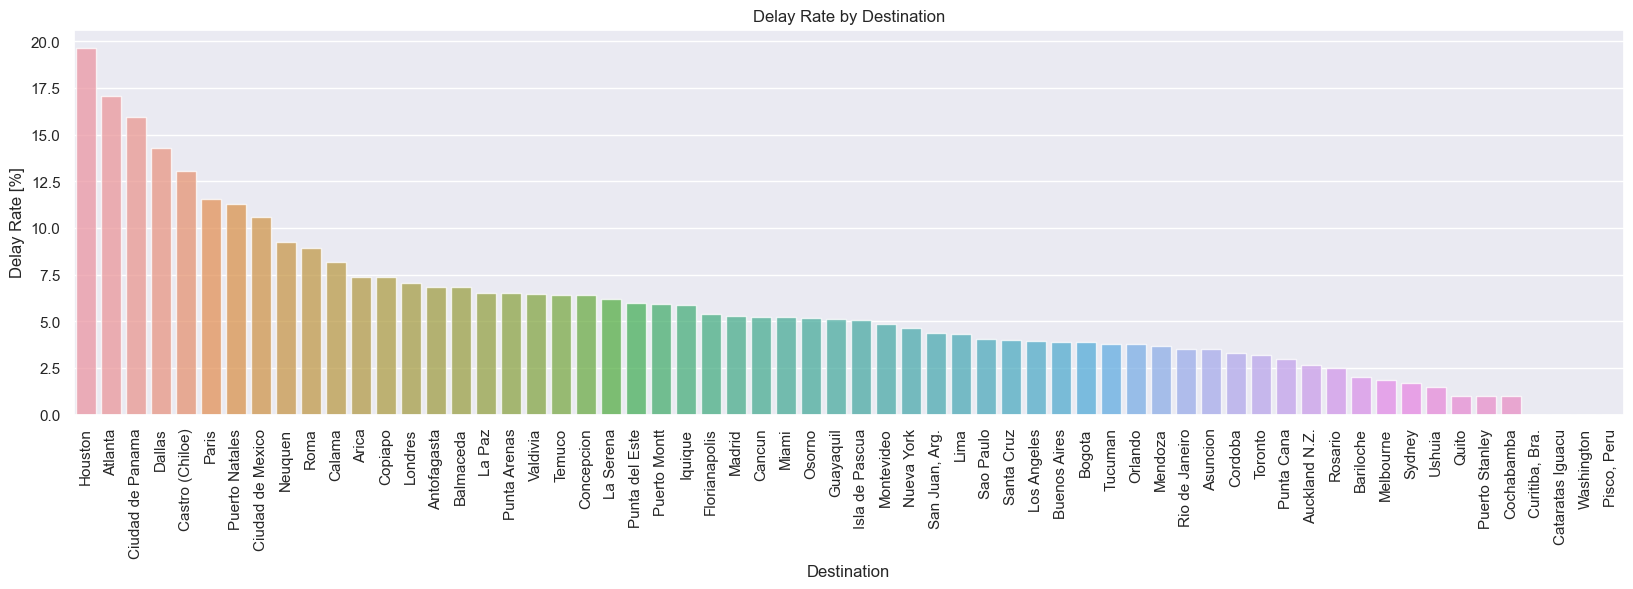

In [18]:
destination_rate = get_rate_from_column(data, 'SIGLADES')
destination_rate_values = data['SIGLADES'].value_counts().index

# Ensure destination_rate_values and destination_rate['Tasa (%)'] are aligned
destination_rate_sorted = destination_rate.loc[destination_rate_values]

# Sort the values of destination_rate_values according to the values of destination_rate['Tasa (%)']
sorted_destination_rate = destination_rate_sorted.sort_values(by='Tasa (%)', ascending=False)

# Create a new figure with a specified size
plt.figure(figsize=(20, 5))

# Create a bar plot with Seaborn
sns.barplot(x=sorted_destination_rate.index, y=sorted_destination_rate['Tasa (%)'], alpha=0.75)

# Set the parameters of the plot
plt.title('Delay Rate by Destination')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Destination', fontsize=12)

# Rotate x-axis labels 90 degrees for readability with many destinations
plt.xticks(rotation=90)

plt.show()


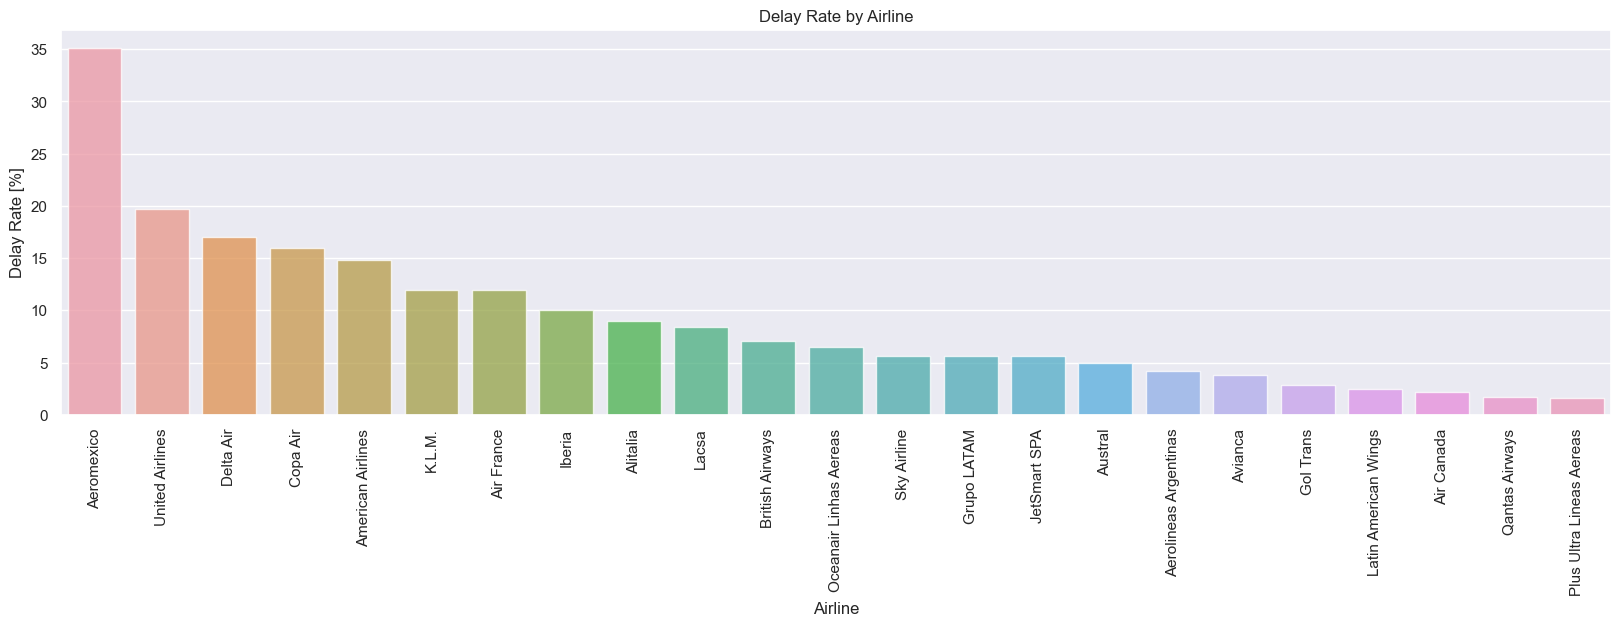

In [19]:
airlines_rate = get_rate_from_column(data, 'OPERA')
airlines_rate_values = data['OPERA'].value_counts().index

# Ensure airlines_rate_values and airlines_rate['Tasa (%)'] are aligned
airlines_rate_sorted = airlines_rate.loc[airlines_rate_values]

# Sort the values of airlines_rate_values according to the values of airlines_rate['Tasa (%)']
sorted_airlines_rate = airlines_rate_sorted.sort_values(by='Tasa (%)', ascending=False)

# Create a new figure with a specified size
plt.figure(figsize=(20, 5))

# Create a bar plot with Seaborn
sns.barplot(x=sorted_airlines_rate.index, y=sorted_airlines_rate['Tasa (%)'], alpha=0.75)

# Set the parameters of the plot
plt.title('Delay Rate by Airline')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Airline', fontsize=12)

# Rotate the x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)

plt.show()

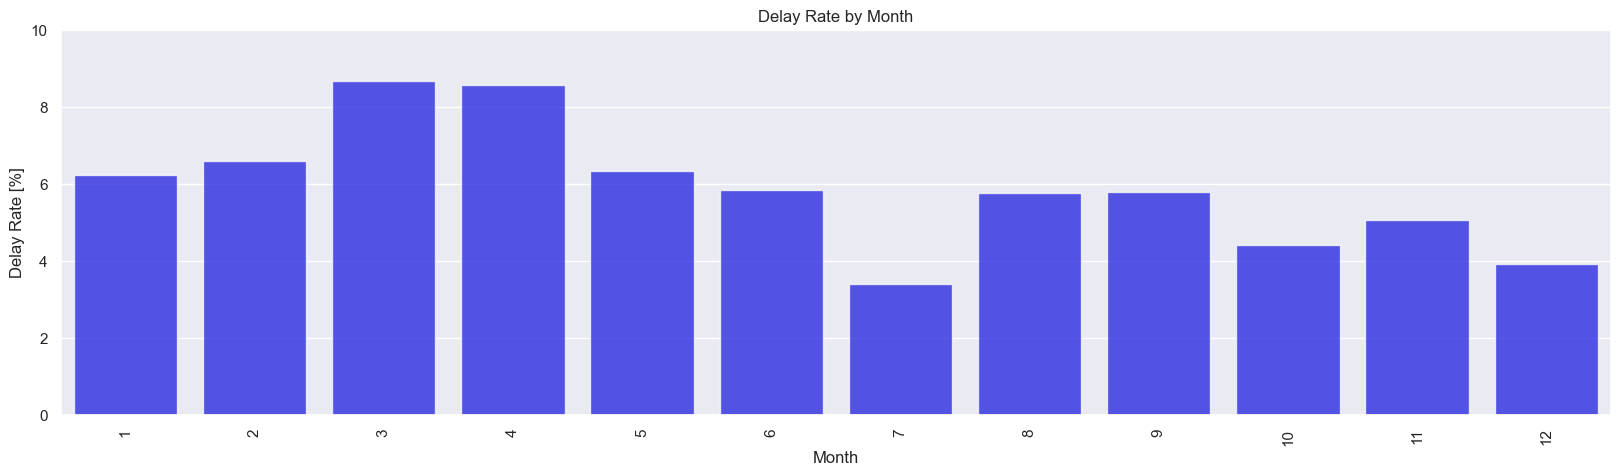

In [20]:
month_rate = get_rate_from_column(data, 'MES')

# Get the unique month values sorted by their frequency
month_rate_values = data['MES'].value_counts().index

# Ensure month_rate_values and month_rate['Tasa (%)'] are aligned
month_rate_sorted = month_rate.loc[month_rate_values]

# Sort the values of month_rate_values according to the values of month_rate['Tasa (%)']
sorted_month_rate = month_rate_sorted.sort_values(by='Tasa (%)', ascending=False)

# Create a new figure with a specified size
plt.figure(figsize=(20, 5))

# Create a bar plot with Seaborn
sns.barplot(x=sorted_month_rate.index, y=sorted_month_rate['Tasa (%)'], color='blue', alpha=0.75)

# Set the parameters of the plot
plt.title('Delay Rate by Month')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Month', fontsize=12)

# Rotate the x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)

# Set the limits of the y-axis
plt.ylim(0, 10)

plt.show()

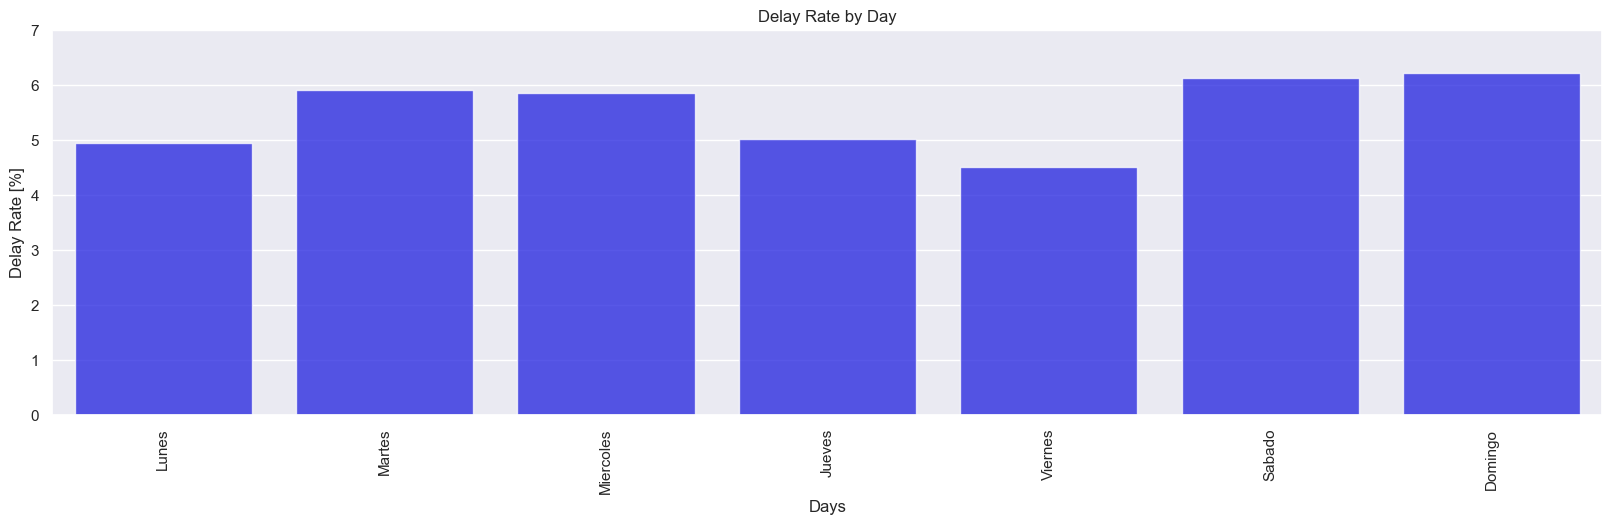

In [21]:
days_rate = get_rate_from_column(data, 'DIANOM')

# Preefine the order of days
day_order = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']

# Ensure days_rate is sorted according to the predefined day order
sorted_days_rate = days_rate.loc[day_order]

# Create a new figure with a specified size
plt.figure(figsize=(20, 5))

# Create a bar plot with Seaborn
sns.barplot(x=sorted_days_rate.index, y=sorted_days_rate['Tasa (%)'], color='blue', alpha=0.75)

# Set the parameters of the plot
plt.title('Delay Rate by Day')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Days', fontsize=12)

# Rotate the x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)

# Set the limits of the y-axis
plt.ylim(0, 7)

plt.show()

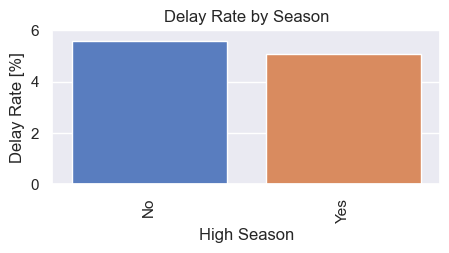

In [22]:
high_season_rate = get_rate_from_column(data, 'high_season')

# Get the unique values of the high season column sorted by their frequency
high_season_rate_values = data['high_season'].value_counts().index

# Create a new figure with a specified size
plt.figure(figsize=(5, 2))

# Create a bar plot with Seabon, using x and y explicitly
sns.barplot(x=high_season_rate_values, y=high_season_rate['Tasa (%)'], palette="muted")

# Set the parameters of the plot
plt.title('Delay Rate by Season')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('High Season', fontsize=12)

# Set the x-axis ticks to be more readable, using "No" and "Yes" as labels and rotating them by 90 degrees
plt.xticks(ticks=range(len(high_season_rate_values)), labels=["No", "Yes"], rotation=90)

# Set the limits of the y-axis
plt.ylim(0, 6)

plt.show()

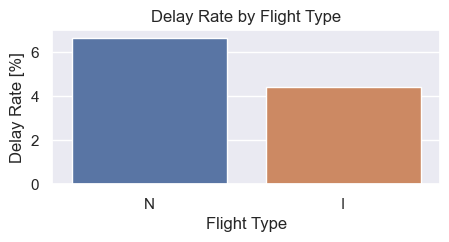

In [23]:
flight_type_rate = get_rate_from_column(data, 'TIPOVUELO')

# Get the unique values of the flight type column sorted by their frequency
flight_type_rate_values = data['TIPOVUELO'].value_counts().index

# Create a new figure with a specified size
plt.figure(figsize=(5, 2))

# Create a bar plot with Seaborn, using x and y explicitly
sns.barplot(x=flight_type_rate_values, y=flight_type_rate['Tasa (%)'])

# Set the parameters of the plot
plt.title('Delay Rate by Flight Type')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Flight Type', fontsize=12)

# Set the limits of the y-axis
plt.ylim(0, 7)

plt.show()

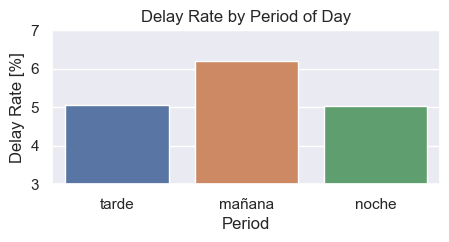

In [24]:
period_day_rate = get_rate_from_column(data, 'period_day')

# Get the unique values of the period of the day column sorted by their frequency
period_day_rate_values = data['period_day'].value_counts().index

# Create a new figure with a specified size
plt.figure(figsize=(5, 2))

# Create a bar plot with Seaborn, using x and y explicitly
sns.barplot(x=period_day_rate_values, y=period_day_rate['Tasa (%)'])

# Set the parameters of the plot
plt.title('Delay Rate by Period of Day')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Period', fontsize=12)

# Set the limits of the y-axis
plt.ylim(3, 7)

plt.show()

## 4. Training

### 4.a. Data Split (Training and Validation)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report

In [26]:
# Shuffle the data to ensure randomness
training_data = shuffle(data[['OPERA', 'MES', 'TIPOVUELO', 'SIGLADES', 'DIANOM', 'delay']], random_state = 111)

In [27]:
# Create feature set for categorical variables
features = pd.concat([
    pd.get_dummies(data['OPERA'], prefix = 'OPERA'),
    pd.get_dummies(data['TIPOVUELO'], prefix = 'TIPOVUELO'), 
    pd.get_dummies(data['MES'], prefix = 'MES')], 
    axis = 1
)
target = data['delay']

In [28]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.33, random_state = 42)

In [29]:
# Print the shapes of the training and testing sets
print(f"train shape: {x_train.shape} | test shape: {x_test.shape}")

train shape: (45698, 37) | test shape: (22508, 37)


In [30]:
# Display the distribution of the target variable in the training set
y_train.value_counts('%')*100

0    81.618452
1    18.381548
Name: delay, dtype: float64

In [31]:
# Display the distribution of the target variable in the testing set
y_test.value_counts('%')*100

0    81.277768
1    18.722232
Name: delay, dtype: float64

### 4.b. Model Selection

#### 4.b.i. XGBoost

In [32]:
import xgboost as xgb
from xgboost import plot_importance

In [33]:
# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [34]:
# Make predictions using the XGBoost model
xgboost_y_preds = xgb_model.predict(x_test)
xgboost_y_preds = [1 if y_pred > 0.5 else 0 for y_pred in xgboost_y_preds]

In [35]:
# Evaluate the XGBoost model
confusion_matrix(y_test, xgboost_y_preds)

array([[18294,     0],
       [ 4214,     0]], dtype=int64)

In [36]:
print(classification_report(y_test, xgboost_y_preds))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     18294
           1       0.00      0.00      0.00      4214

    accuracy                           0.81     22508
   macro avg       0.41      0.50      0.45     22508
weighted avg       0.66      0.81      0.73     22508



#### 4.b.ii. Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
# Initialize and train the Logistic Regression model
reg_model = LogisticRegression()
reg_model.fit(x_train, y_train)

LogisticRegression()

In [39]:
# Make predictions using the Logistic Regression model
reg_y_preds = reg_model.predict(x_test)

In [40]:
# Evaluate the Logistic Regression model
confusion_matrix(y_test, reg_y_preds)

array([[18193,   101],
       [ 4086,   128]], dtype=int64)

In [41]:
print(classification_report(y_test, reg_y_preds))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     18294
           1       0.56      0.03      0.06      4214

    accuracy                           0.81     22508
   macro avg       0.69      0.51      0.48     22508
weighted avg       0.77      0.81      0.74     22508



## 5. Data Analysis: Third Sight

### Feature Importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 1000x500 with 0 Axes>

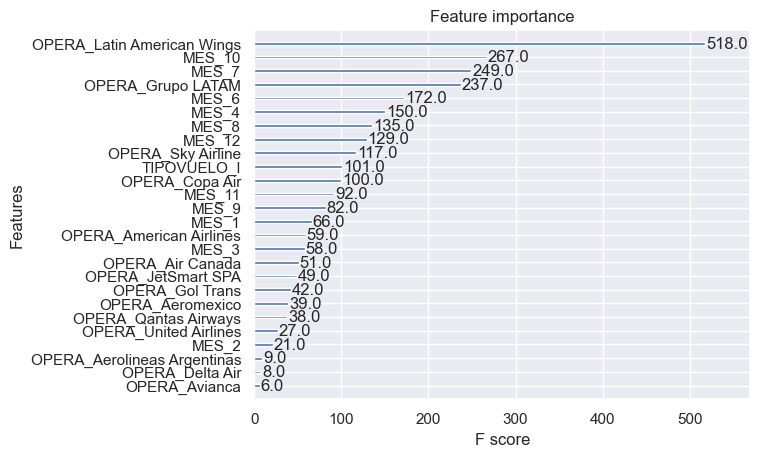

In [42]:
# Plot feature importance
plt.figure(figsize = (10,5))
plot_importance(xgb_model)

In [43]:
# Define the top 10 important features
top_10_features = [
    "OPERA_Latin American Wings", 
    "MES_7",
    "MES_10",
    "OPERA_Grupo LATAM",
    "MES_12",
    "TIPOVUELO_I",
    "MES_4",
    "MES_11",
    "OPERA_Sky Airline",
    "OPERA_Copa Air"
]

### Data Balance

In [44]:
# Calculate the scale for balancing the classes
n_y0 = len(y_train[y_train == 0])
n_y1 = len(y_train[y_train == 1])
scale = n_y0/n_y1
print(scale)

4.4402380952380955


## 6. Training with Improvement

### 6.a. Data Split

In [45]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(features[top_10_features], target, test_size = 0.33, random_state = 42)

### 6.b. Model Selection

#### 6.b.i. XGBoost with Feature Importance and with Balance

In [46]:
# Initialize and train the XGBoost model with class balancing
xgb_model_2 = xgb.XGBClassifier(random_state=1, learning_rate=0.01, scale_pos_weight = scale)
xgb_model_2.fit(x_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [47]:
# Make predictions using the XGBoost model with class balancing
xgboost_y_preds_2 = xgb_model_2.predict(x_test2)

In [48]:
# Evaluate the XGBoost model with class balancing
confusion_matrix(y_test2, xgboost_y_preds_2)

array([[9556, 8738],
       [1313, 2901]], dtype=int64)

In [49]:
print(classification_report(y_test2, xgboost_y_preds_2))

              precision    recall  f1-score   support

           0       0.88      0.52      0.66     18294
           1       0.25      0.69      0.37      4214

    accuracy                           0.55     22508
   macro avg       0.56      0.61      0.51     22508
weighted avg       0.76      0.55      0.60     22508



#### 6.b.ii. XGBoost with Feature Importance but without Balance

In [50]:
# Initialize and train the XGBoost model without class balancing
xgb_model_3 = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
xgb_model_3.fit(x_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [51]:
# Make predictions using the XGBoost model without class balancing
xgboost_y_preds_3 = xgb_model_3.predict(x_test2)

In [52]:
# Evaluate the XGBoost model without class balancing
confusion_matrix(y_test2, xgboost_y_preds_3)

array([[18286,     8],
       [ 4188,    26]], dtype=int64)

In [53]:
print(classification_report(y_test2, xgboost_y_preds_3))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     18294
           1       0.76      0.01      0.01      4214

    accuracy                           0.81     22508
   macro avg       0.79      0.50      0.45     22508
weighted avg       0.80      0.81      0.73     22508



#### 6.b.iii. Logistic Regression with Feature Importante and with Balance

In [54]:
# Initialize and train the Logistic Regression model with class balancing
reg_model_2 = LogisticRegression(class_weight={1: n_y0/len(y_train), 0: n_y1/len(y_train)})
reg_model_2.fit(x_train2, y_train2)

LogisticRegression(class_weight={0: 0.18381548426626987, 1: 0.8161845157337302})

In [55]:
# Make predictions using the Logistic Regression model with class balancing
reg_y_preds_2 = reg_model_2.predict(x_test2)

In [56]:
# Evaluate the Logistic Regression model with class balancing
confusion_matrix(y_test2, reg_y_preds_2)

array([[9487, 8807],
       [1314, 2900]], dtype=int64)

In [57]:
print(classification_report(y_test2, reg_y_preds_2))

              precision    recall  f1-score   support

           0       0.88      0.52      0.65     18294
           1       0.25      0.69      0.36      4214

    accuracy                           0.55     22508
   macro avg       0.56      0.60      0.51     22508
weighted avg       0.76      0.55      0.60     22508



#### 6.b.iv. Logistic Regression with Feature Importante but without Balance

In [58]:
# Initialize and train the Logistic Regression model without class balancing
reg_model_3 = LogisticRegression()
reg_model_3.fit(x_train2, y_train2)

LogisticRegression()

In [59]:
# Make predictions using the Logistic Regression model without class balancing
reg_y_preds_3 = reg_model_3.predict(x_test2)

In [60]:
# Evaluate the Logistic Regression model without class balancing
confusion_matrix(y_test2, reg_y_preds_3)

array([[18246,    48],
       [ 4160,    54]], dtype=int64)

In [61]:
print(classification_report(y_test2, reg_y_preds_3))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     18294
           1       0.53      0.01      0.03      4214

    accuracy                           0.81     22508
   macro avg       0.67      0.51      0.46     22508
weighted avg       0.76      0.81      0.73     22508



## 7. Data Science Conclusions

By looking at the results of the 6 trained models, it can be determined:
- There is no noticeable difference in results between XGBoost and LogisticRegression.
- Does not decrease the performance of the model by reducing the features to the 10 most important.
- Improves the model's performance when balancing classes, since it increases the recall of class "1".

**With this, the model to be productive must be the one that is trained with the top 10 features and class balancing, but which one?**